In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

%matplotlib inline

In [82]:
train_raw_data = pd.read_csv('train.csv')
test_raw_data = pd.read_csv('test.csv')

In [83]:
train_raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
test_raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [85]:
all_data = pd.concat([
    train_raw_data.loc[:,'MSSubClass':'SaleCondition'],
    test_raw_data.loc[:,'MSSubClass':'SaleCondition']])
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [86]:
list(all_data.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [87]:
train_raw_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/pd/miniconda3/envs/dpl/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


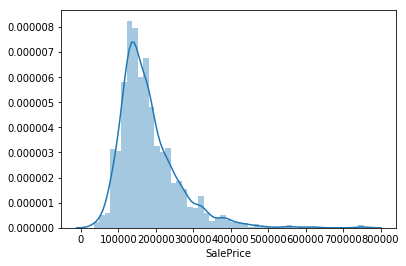

In [88]:
sns.distplot(train_raw_data.SalePrice)

In [89]:
print('Skewness:{}'.format(train_raw_data.SalePrice.skew()))
print('Kurtosis:{}'.format(train_raw_data.SalePrice.kurt()))

Skewness:1.8828757597682129
Kurtosis:6.536281860064529


### Skewness:
![skewness](skewness.png)
### Kurtosis:
![kurtosis](kurtosis.png)

In [90]:
def scatter_plot(df, x_col_name, y_col_name):
    data = pd.concat([df[x_col_name], df[y_col_name]], axis=1)
    data.plot.scatter(x=x_col_name, y=y_col_name)

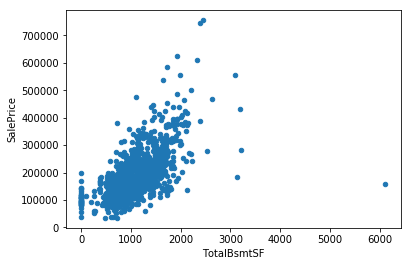

In [91]:
scatter_plot(train_raw_data, 'TotalBsmtSF', 'SalePrice')

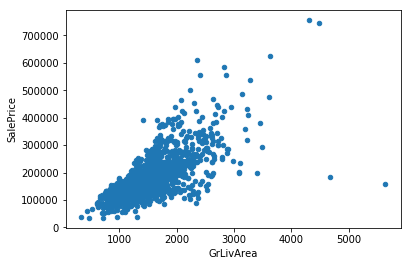

In [92]:
scatter_plot(train_raw_data, 'GrLivArea', 'SalePrice')

In [93]:
def box_plot(df, x_col_name, y_col_name):
    data = pd.concat([df[x_col_name], df[y_col_name]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=x_col_name, y=y_col_name, data=data)


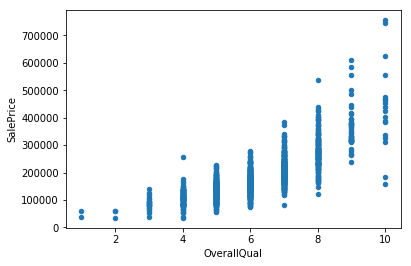

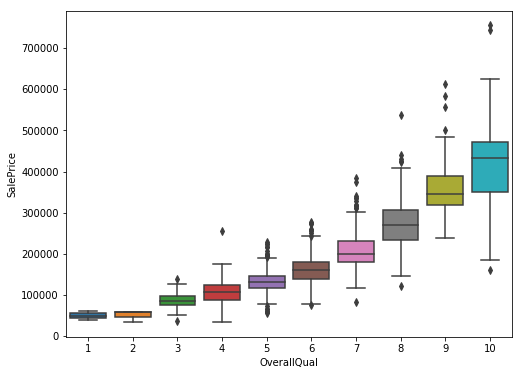

In [94]:
scatter_plot(train_raw_data, 'OverallQual', 'SalePrice')
box_plot(train_raw_data, 'OverallQual', 'SalePrice')

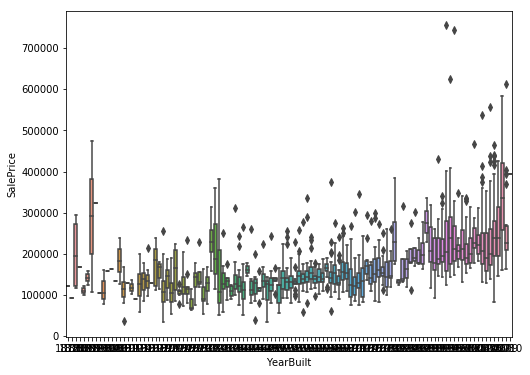

In [95]:
box_plot(train_raw_data, 'YearBuilt', 'SalePrice')

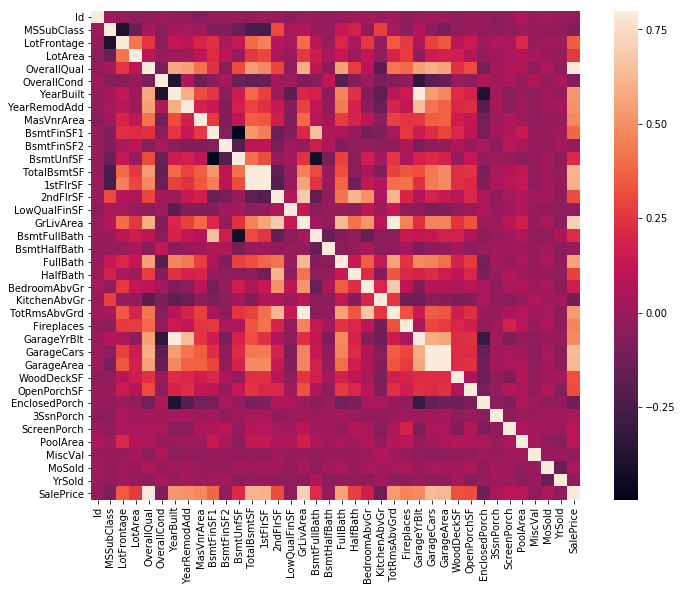

In [96]:
corrmat = train_raw_data.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=True,vmax=0.8)

In [97]:
corrmat.nlargest(10, 'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


`DataFrame.nlargest(n, columns, keep='first')`
Get the rows of a DataFrame sorted by the n largest values of columns.
e.g.
`df.nlargest(3, 'col_name')`

In [98]:
# train_raw_data.isnull().sum(axis=0).sort_values(ascending=False)

In [99]:
# train_raw_data.isnull().count().sort_values(ascending=False)

In [100]:
total = train_raw_data.isnull().sum(axis=0).sort_values(ascending=False)
percent = (train_raw_data.isnull().sum(axis=0) / train_raw_data.isnull().count(axis=0)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [101]:
missing_data['Total'] > 1

PoolQC            True
MiscFeature       True
Alley             True
Fence             True
FireplaceQu       True
LotFrontage       True
GarageCond        True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageQual        True
BsmtExposure      True
BsmtFinType2      True
BsmtFinType1      True
BsmtCond          True
BsmtQual          True
MasVnrArea        True
MasVnrType        True
Electrical       False
Utilities        False
YearRemodAdd     False
MSSubClass       False
Foundation       False
ExterCond        False
ExterQual        False
Exterior2nd      False
Exterior1st      False
RoofMatl         False
RoofStyle        False
YearBuilt        False
                 ...  
GarageArea       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
3SsnPorch        False
BsmtUnfSF        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
Functional 

In [102]:
train_processed_data = train_raw_data.drop(columns=list(missing_data[missing_data['Total']>1].index))


In [103]:
train_processed_data = train_processed_data.drop(train_raw_data.loc[train_raw_data['Electrical'].isnull()].index)
                                                                

In [104]:
train_processed_data.isnull().sum().max()

0

/Users/pd/miniconda3/envs/dpl/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


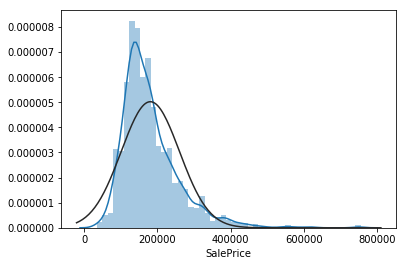

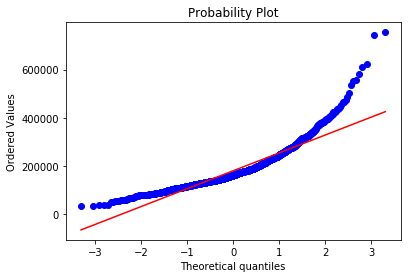

In [105]:
sns.distplot(train_raw_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_raw_data['SalePrice'], plot=plt)

In [106]:
print(train_raw_data['SalePrice'].skew())
train_raw_data['SalePrice'] = np.log(train_raw_data['SalePrice'])
print(train_raw_data['SalePrice'].skew())

1.8828757597682129
0.12133506220520406


/Users/pd/miniconda3/envs/dpl/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


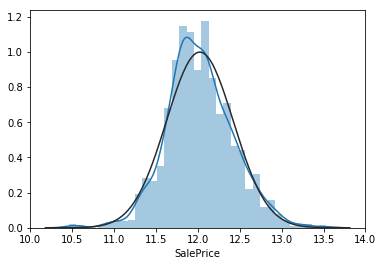

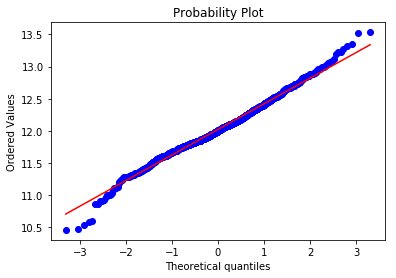

In [78]:
sns.distplot(train_raw_data['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_raw_data['SalePrice'], plot=plt)